In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<h1>Завдання 1</h1>

Побудувати емпіричну функцію розподілу даних

In [4]:
x = np.array([2, 4, 6, 8, 10])
n = np.array([1, 3, 5, 7, 4])

In [5]:
N = np.sum(n)
print(f'Загальна кількість спостережень: {N}')

Загальна кількість спостережень: 20


Обчислєємо накопичені частоти. При x < 2 значення функції розподілу буде  рівне 0.

In [7]:
df = pd.DataFrame([x, n]).T
df.columns = ['x', 'n']
df['frequency'] = df['n'] / N
df['cumulative_frequency'] = df['frequency'].cumsum()

In [8]:
df

,x,n,frequency,cumulative_frequency
0,2,1,0.05,0.05
1,4,3,0.15,0.20
2,6,5,0.25,0.45
3,8,7,0.35,0.80
4,10,4,0.20,1.00


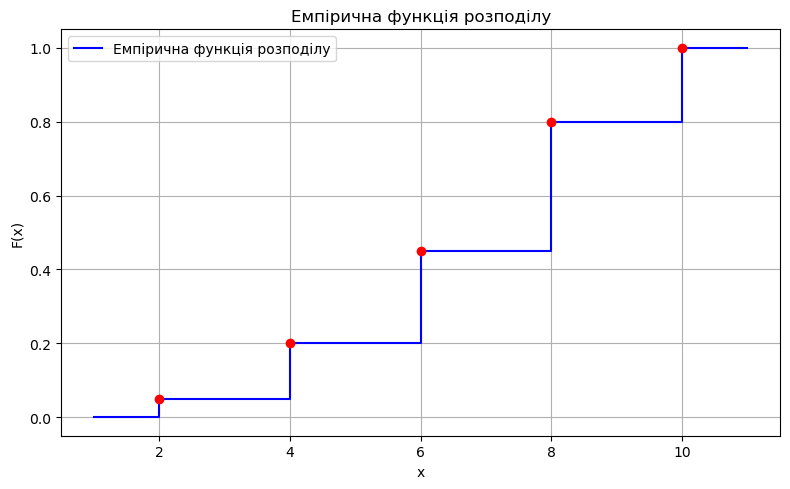

In [9]:
x_plot = [df['x'].iloc[0] - 1]  # початкова точка лівіше мінімального x
y_plot = [0]

for i in range(len(df)):
    x_plot.extend([df['x'].iloc[i], df['x'].iloc[i]])
    y_plot.extend([y_plot[-1], df['cumulative_frequency'].iloc[i]])

x_plot.append(df['x'].iloc[-1] + 1)  # кінець правіше максимального x
y_plot.append(1)

plt.figure(figsize=(8, 5))
plt.step(x_plot, y_plot, where='post', color='blue', label='Емпірична функція розподілу')
plt.scatter(df['x'], df['cumulative_frequency'], color='red', zorder=5)
plt.title('Емпірична функція розподілу')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<h1>Завдання 2</h1>

Перевірити задане значення на аномальність за правилом 3-х сигм

In [12]:
x = np.array([0.5, 3, 3.5, 4, 4.5])
n = np.array([1, 3, 7, 8, 1])

In [13]:
N = np.sum(n)
print(f'Загальна кількість спостережень: {N}')

Загальна кількість спостережень: 20


In [14]:
total_sum = 0
for i, j in zip(x, n):
    total_sum += i*j

avg = total_sum/N
print(f'Математичне сподівання: {avg}')

Математичне сподівання: 3.525


In [15]:
square_diff = 0
for i, j in zip(x, n):
    square_diff += j * (i - avg)**2

variance = square_diff/N
print(f'Дисперсія: {variance}')

Дисперсія: 0.636875


In [16]:
standard_deviation = variance**0.5
print(f'Стандартне відхилення: {standard_deviation}')

Стандартне відхилення: 0.7980444849756184


In [17]:
normalized_x = (x - avg)/standard_deviation
print(normalized_x)

[-3.79051551 -0.65785806 -0.03132657  0.59520492  1.2217364 ]


Бачимо, що перше значення (0.5) відхиляється від середнього на більш ніж 3 стандартні відхилення, тому воно є аномальним.

<h1>Завдання 3</h1>

При рівні значимості a=0.05 перевірити гіпотезу про нормальність розподілу даних згідно критерію Колмогорова (lambda_kolm=1.45)

In [21]:
n = np.array([2, 5, 6, 4, 3])
m = np.array([1, 4, 5, 7, 3])

In [22]:
N = np.sum(n)
print(f'Загальна кількість емпіричних спостережень: {N}')

M = np.sum(m)
print(f'Загальна кількість теоретичних спостережень: {M}')

Загальна кількість емпіричних спостережень: 20
Загальна кількість теоретичних спостережень: 20


Порахуємо теоретичні та емпіричні частоти та їх накопичені значення

In [24]:
df = pd.DataFrame([n, m]).T
df.columns = ['n', 'm']

df['emp_freq'] = df['n']/N
df['theor_freq'] = df['m']/M

df['cum_emp_freq'] = df['emp_freq'].cumsum()
df['cum_theor_freq'] = df['theor_freq'].cumsum()

df

,n,m,emp_freq,theor_freq,cum_emp_freq,cum_theor_freq
0,2,1,0.10,0.05,0.10,0.05
1,5,4,0.25,0.20,0.35,0.25
2,6,5,0.30,0.25,0.65,0.50
3,4,7,0.20,0.35,0.85,0.85
4,3,3,0.15,0.15,1.00,1.00


Знайдемо максимальне відхилення

In [26]:
df['abs_deviation'] = (df['cum_emp_freq'] - df['cum_theor_freq']).map(np.abs).round(2)
df

,n,m,emp_freq,theor_freq,cum_emp_freq,cum_theor_freq,abs_deviation
0,2,1,0.10,0.05,0.10,0.05,0.05
1,5,4,0.25,0.20,0.35,0.25,0.10
2,6,5,0.30,0.25,0.65,0.50,0.15
3,4,7,0.20,0.35,0.85,0.85,0.00
4,3,3,0.15,0.15,1.00,1.00,0.00


In [27]:
max_abs_deviation = df['abs_deviation'].max()
print(f'Максимальне відхилення: {max_abs_deviation}')

Максимальне відхилення: 0.15


In [28]:
lambda_emp = round(max_abs_deviation * N**0.5, 4)
print(f'Емпіричне значення критерію Колмогорова: {lambda_emp}')

Емпіричне значення критерію Колмогорова: 0.6708


Оскільки емпіричне значення критерію Колмогорова менше за критичне значення 1.45, то у нас немає підстав відхиляти нульову гіпотезу і дані два набори даних належать одному розподілу